<a href="https://colab.research.google.com/github/Mostafahiisham/7_segment/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration = 1 , Loss = 8304.157433478375
Iteration = 1 , Loss = 1008.0673124651566
Iteration = 1 , Loss = 128.43002070370028
Iteration = 1 , Loss = 22.378456422786126
Iteration = 2 , Loss = 9.592578602412152
Iteration = 3 , Loss = 8.05107611366998
Iteration = 4 , Loss = 7.86522736426514
Iteration = 5 , Loss = 7.84282006956071
Iteration = 6 , Loss = 7.840117739619836
Iteration = 7 , Loss = 7.839791096086974
Iteration = 8 , Loss = 7.839750872078978
Iteration = 9 , Loss = 7.839745179662644
Iteration = 10 , Loss = 7.839743650515275
Iteration = 11 , Loss = 7.839742623345865
Iteration = 12 , Loss = 7.839741656738801
Iteration = 13 , Loss = 7.8397406974757615
Iteration = 14 , Loss = 7.839739739140593
Iteration = 15 , Loss = 7.839738780959746
Iteration = 16 , Loss = 7.839737822839957
Iteration = 17 , Loss = 7.8397368647699786
Iteration = 18 , Loss = 7.8397359067484516
Iteration = 19 , Loss = 7.839734948775213
Iteration = 20 , Loss = 7.839733990850238


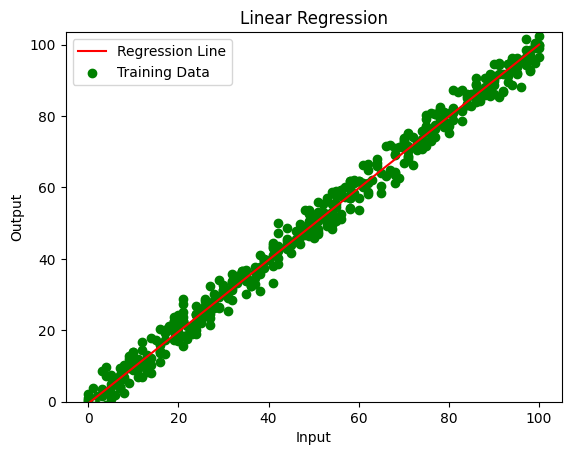

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data = data.dropna()
#training data and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#valid data and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)


class LinearRegression:
    def __init__(self):
        self.parameters = {}
    def Forward_Propagation(self,train_input):
      theta_1 = self.parameters['m']    #slope
      theta_0 = self.parameters['c']    #Bias
      # y(prediction) = th_0 +th_1*X
      prediction = np.multiply(theta_1,train_input) + theta_0
      return prediction

    def cost_function(self, prediction, train_output):
       cost = np.mean((train_output - prediction)**2)
       return cost

    def Backward_Propagation(self,train_input,train_output,prediction):
        derivatives = {}
        df = (prediction - train_output)
        #dTh_1 = 2/n * mean of(Prediction - Actual) * Input
        dTh_1 = 2 * np.mean(np.multiply(df,train_input))
        #dTh_0 = 2/n * mean of(Prediction _Actual)
        dTh_0 = np.mean(df)
        derivatives['dm'] = dTh_1
        derivatives['dc'] = dTh_0
        return derivatives

    def Update_Parameters(self,derivatives,Learning_Rate):
      #th1 = th1 - alpha * dth1
      self.parameters['m'] =  self.parameters['m'] - Learning_Rate * derivatives['dm']
      #th0 = th0 - alpha * dth0
      self.parameters['c'] =  self.parameters['c'] - Learning_Rate * derivatives['dc']

    def train(self,train_input,train_output,Learning_Rate,Iters):
      #Initialize Random Parameters for theta0 and theta1
      self.parameters['m'] = np.random.uniform(0,1) * -1
      self.parameters['c'] = np.random.uniform(0,1) * -1

      #Initalize Loss
      self.loss = []

      fig, ax = plt.subplots()
      x_vals = np.linspace(min(train_input),max(train_input),100)
      line, = ax.plot(x_vals,self.parameters['m'] * x_vals + self.parameters['c'],color = 'red',label = 'Regression Line')

      ax.scatter(train_input,train_output,marker= 'o',color = 'green',label = 'Training Data')
      #set y-axis limit to exclude negative values
      ax.set_ylim(0,max(train_output)+1)

      def update(frame):

        #forward propagation to get the y(prediction)
        #prediction = theta1*x +theta0
        prediction = self.Forward_Propagation(train_input)

        #cost function
        # j = mean of (prediction - actual)^2
        Cost = self.cost_function(prediction, train_output)
        # Back Propagation
        derivatives = self.Backward_Propagation(train_input,train_output,prediction)

        #Update The Theta Values to minimize The Cost Function
        self.Update_Parameters(derivatives,Learning_Rate)

        #update Regression Value
        line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])

        # Append loss and print
        self.loss.append(Cost)
        print("Iteration = {} , Loss = {}".format(frame + 1,Cost))
        return line,

         # Create animation
      ani = FuncAnimation(fig, update, frames=Iters, interval=200, blit=True)

        # Save the animation as a video file (e.g., MP4)
      ani.save('linear_regression_A.gif', writer='ffmpeg')

      plt.xlabel('Input')
      plt.ylabel('Output')
      plt.title('Linear Regression')
      plt.legend()
      plt.show()

      return self.parameters, self.loss


Linear_reg = LinearRegression()
parameters, loss = Linear_reg.train(train_input,train_output,0.0001,20)



